In [1]:
import os, cv, math
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.utils import plot_model
import numpy as np
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import Augmentor
%matplotlib inline

Using TensorFlow backend.
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
dataset_path = 'asl_dataset_augmented'
dataset_list = os.listdir(dataset_path)
print(dataset_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'test_set', 'training_set', 'U', 'V', 'validation_set', 'W', 'X', 'Y', 'Z']


In [5]:
training_path = dataset_path
for i in dataset_list:
    p = Augmentor.Pipeline(os.path.join(training_path, i))
    p.zoom(probability=0.5, min_factor=1.1, max_factor=1.3)
    p.sample(300)

Executing Pipeline:   0%|          | 0/300 [00:00<?, ? Samples/s]

Initialised with 205 image(s) found.
Output directory set to asl_dataset_augmented\0\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x23BB4D4B6D8>: 100%|██████████| 300/300 [00:01<00:00, 151.81 Samples/s]
Executing Pipeline:   0%|          | 0/300 [00:00<?, ? Samples/s]

Initialised with 206 image(s) found.
Output directory set to asl_dataset_augmented\1\output.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x23BB4DF72B0>: 100%|██████████| 300/300 [00:02<00:00, 133.76 Samples/s]                 
Executing Pipeline:   0%|          | 0/300 [00:00<?, ? Samples/s]

Initialised with 206 image(s) found.
Output directory set to asl_dataset_augmented\2\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x23BB4C6F630>: 100%|██████████| 300/300 [00:02<00:00, 123.02 Samples/s]
Executing Pipeline:   0%|          | 0/300 [00:00<?, ? Samples/s]

Initialised with 206 image(s) found.
Output directory set to asl_dataset_augmented\3\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x23BB4DBC7F0>: 100%|██████████| 300/300 [00:02<00:00, 114.15 Samples/s]
Executing Pipeline:   0%|          | 0/300 [00:00<?, ? Samples/s]

Initialised with 207 image(s) found.
Output directory set to asl_dataset_augmented\4\output.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x23BB4DCB550>: 100%|██████████| 300/300 [00:02<00:00, 108.58 Samples/s]                 
Executing Pipeline:   0%|          | 0/300 [00:00<?, ? Samples/s]

Initialised with 207 image(s) found.
Output directory set to asl_dataset_augmented\5\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x23BB4DD6EF0>: 100%|██████████| 300/300 [00:02<00:00, 114.68 Samples/s]
Executing Pipeline:   0%|          | 0/300 [00:00<?, ? Samples/s]

Initialised with 207 image(s) found.
Output directory set to asl_dataset_augmented\6\output.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x23BB4D1FE80>: 100%|██████████| 300/300 [00:02<00:00, 143.34 Samples/s]                 
Executing Pipeline:   0%|          | 0/300 [00:00<?, ? Samples/s]

Initialised with 206 image(s) found.
Output directory set to asl_dataset_augmented\7\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x23BB4DEB4E0>: 100%|██████████| 300/300 [00:02<00:00, 140.44 Samples/s] 
Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x23BB4DC8518>:   0%|          | 0/300 [00:00<?, ? Samples/s]

Initialised with 208 image(s) found.
Output directory set to asl_dataset_augmented\8\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x23BB4DC8748>: 100%|██████████| 300/300 [00:02<00:00, 129.13 Samples/s]
Executing Pipeline:   0%|          | 0/300 [00:00<?, ? Samples/s]

Initialised with 204 image(s) found.
Output directory set to asl_dataset_augmented\9\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x23BB4DD6668>: 100%|██████████| 300/300 [00:02<00:00, 111.44 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB5E5FB00>:   1%|          | 2/300 [00:00<00:35,  8.31 Samples/s]                  

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\A\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4D87A90>: 100%|██████████| 300/300 [00:00<00:00, 308.16 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4DF6208>:   1%|▏         | 4/300 [00:00<00:31,  9.30 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\B\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4DC86A0>: 100%|██████████| 300/300 [00:00<00:00, 317.92 Samples/s]                 
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4DEDBE0>:   1%|          | 3/300 [00:00<00:30,  9.76 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\C\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4D15470>: 100%|██████████| 300/300 [00:00<00:00, 330.67 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4DC8C88>:   2%|▏         | 5/300 [00:00<00:10, 29.35 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\D\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4C698D0>: 100%|██████████| 300/300 [00:00<00:00, 311.51 Samples/s]                  
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4CF3588>:   0%|          | 0/300 [00:00<?, ? Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\del\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4D01748>: 100%|██████████| 300/300 [00:00<00:00, 300.07 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4DE3358>:   1%|          | 3/300 [00:00<00:31,  9.32 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\E\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4D4BE80>: 100%|██████████| 300/300 [00:00<00:00, 302.66 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4D0EF60>:   1%|          | 2/300 [00:00<00:38,  7.72 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\F\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4E09390>: 100%|██████████| 300/300 [00:01<00:00, 296.85 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4D044E0>:   1%|          | 2/300 [00:00<00:42,  7.01 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\G\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4C47C88>: 100%|██████████| 300/300 [00:00<00:00, 373.17 Samples/s]                 
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4CF3668>:   0%|          | 1/300 [00:00<00:52,  5.67 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\H\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4E1A940>: 100%|██████████| 300/300 [00:00<00:00, 302.13 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4D13D68>:   1%|▏         | 4/300 [00:00<00:37,  7.92 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\I\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4DE3AC8>: 100%|██████████| 300/300 [00:00<00:00, 337.54 Samples/s]                 
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4D4B8D0>:   0%|          | 1/300 [00:00<00:54,  5.45 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\J\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4D80EF0>: 100%|██████████| 300/300 [00:01<00:00, 297.79 Samples/s]                 
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4DE3198>:   1%|▏         | 4/300 [00:00<00:35,  8.27 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\K\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4C695C0>: 100%|██████████| 300/300 [00:00<00:00, 332.99 Samples/s]                 
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4D05550>:   2%|▏         | 5/300 [00:00<00:11, 25.71 Samples/s]                  

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\L\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4D98AC8>: 100%|██████████| 300/300 [00:00<00:00, 336.67 Samples/s]                  
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4CECA20>:   1%|▏         | 4/300 [00:00<00:37,  7.82 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\M\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4D804A8>: 100%|██████████| 300/300 [00:00<00:00, 334.27 Samples/s]                 
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4CF69E8>:   1%|          | 3/300 [00:00<00:31,  9.55 Samples/s]                  

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\N\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4CF3EF0>: 100%|██████████| 300/300 [00:00<00:00, 314.71 Samples/s]                 
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4D2F278>:   1%|▏         | 4/300 [00:00<00:43,  6.79 Samples/s]                  

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\nothing\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4D141D0>: 100%|██████████| 300/300 [00:00<00:00, 360.08 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4D10780>:   2%|▏         | 6/300 [00:00<00:15, 18.88 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\O\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4D98C18>: 100%|██████████| 300/300 [00:00<00:00, 310.45 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB5E438D0>:   1%|          | 3/300 [00:00<00:33,  8.92 Samples/s]                  

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\P\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4D98320>: 100%|██████████| 300/300 [00:00<00:00, 312.13 Samples/s]                 
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4D0DE10>:   0%|          | 1/300 [00:00<00:51,  5.84 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\Q\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4D1EBE0>: 100%|██████████| 300/300 [00:00<00:00, 325.73 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4DE3940>:   1%|▏         | 4/300 [00:00<00:31,  9.49 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\R\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4D1EC50>: 100%|██████████| 300/300 [00:00<00:00, 309.22 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4C69198>:   2%|▏         | 5/300 [00:00<00:15, 18.57 Samples/s]                  

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\S\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4D4B208>: 100%|██████████| 300/300 [00:00<00:00, 331.39 Samples/s]                 
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4C7D2E8>:   2%|▏         | 6/300 [00:00<00:14, 19.96 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\space\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4D14198>: 100%|██████████| 300/300 [00:00<00:00, 362.13 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4CFF5F8>:   2%|▏         | 5/300 [00:00<00:10, 26.97 Samples/s]                  

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\T\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4C7DA58>: 100%|██████████| 300/300 [00:00<00:00, 318.96 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4D0F940>:   0%|          | 1/300 [00:00<00:39,  7.57 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\U\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4C69588>: 100%|██████████| 300/300 [00:01<00:00, 264.52 Samples/s]                 
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4D10DA0>:   4%|▎         | 11/300 [00:00<00:04, 67.29 Samples/s]                  

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\V\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4D0DF98>: 100%|██████████| 300/300 [00:00<00:00, 411.08 Samples/s]                  
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4DE3668>:   1%|▏         | 4/300 [00:00<00:10, 27.86 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\W\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB5E43B38>: 100%|██████████| 300/300 [00:00<00:00, 312.76 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4D0EB38>:   1%|▏         | 4/300 [00:00<00:14, 19.95 Samples/s]                  

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\X\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4D1EBA8>: 100%|██████████| 300/300 [00:00<00:00, 302.99 Samples/s]                  
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x23BB4D2F978>:   1%|          | 2/300 [00:00<00:29, 10.00 Samples/s]

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\Y\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4CFF710>: 100%|██████████| 300/300 [00:00<00:00, 353.68 Samples/s]                 
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4DF8EB8>:   3%|▎         | 8/300 [00:00<00:08, 35.66 Samples/s]                  

Initialised with 300 image(s) found.
Output directory set to asl_dataset_augmented\Z\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x23BB4D80550>: 100%|██████████| 300/300 [00:01<00:00, 285.69 Samples/s]                  


In [38]:
train_set = {}
validation_set = {}
test_set = {}

for cat in os.listdir(dataset_path):
    cat_dir = os.path.join(dataset_path, cat, 'output')
    cat_files = os.listdir(cat_dir)
    train_list, test_list = train_test_split(cat_files, test_size=0.3)
    validation_list, test_list = train_test_split(test_list, test_size=0.5)
    
    train_set[cat] = train_list
    test_set[cat] = test_list
    validation_set[cat] = validation_list

0
1
2
3
4
5
6
7
8
9
A
B
C
D
del
E
F
G
H
I
J
K
L
M
N
nothing
O
P
Q
R
S
space
T


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'asl_dataset_augmented\\test_set\\output'

In [8]:
for cat in tqdm(train_set.keys()):
    cat_dir = os.path.join(dataset_path, 'training_set', 'class_' + str(cat))
    os.makedirs(cat_dir)
    for file in train_set[cat]:
        src = os.path.join(dataset_path, cat, 'output', file)
        dest = os.path.join(cat_dir, file)
        copyfile(src, dest)

100%|██████████| 39/39 [02:59<00:00,  4.59s/it]


In [11]:
for cat in tqdm(validation_set.keys()):
    cat_dir = os.path.join(dataset_path, 'validation_set', 'class_' + str(cat))
    os.makedirs(cat_dir)
    for file in validation_set[cat]:
        src = os.path.join(dataset_path, cat,'output', file)
        dest = os.path.join(cat_dir, file)
        copyfile(src, dest)

100%|██████████| 39/39 [00:33<00:00,  1.17it/s]


In [12]:
for cat in tqdm(test_set.keys()):
    cat_dir = os.path.join(dataset_path, 'test_set', 'class_' + str(cat))
    os.makedirs(cat_dir)
    for file in test_set[cat]:
        src = os.path.join(dataset_path, cat,'output', file)
        dest = os.path.join(cat_dir, file)
        copyfile(src, dest)

100%|██████████| 39/39 [00:28<00:00,  1.36it/s]


In [13]:
for i in train_set.keys():
    print(i+ "- Training size: "+ str(len(train_set[i]))+ " Validation set: "+ str(len(validation_set[i]))+ " Test set: "+ str(len(test_set[i])))

0- Training size: 210 Validation set: 45 Test set: 45
1- Training size: 210 Validation set: 45 Test set: 45
2- Training size: 210 Validation set: 45 Test set: 45
3- Training size: 210 Validation set: 45 Test set: 45
4- Training size: 210 Validation set: 45 Test set: 45
5- Training size: 210 Validation set: 45 Test set: 45
6- Training size: 210 Validation set: 45 Test set: 45
7- Training size: 210 Validation set: 45 Test set: 45
8- Training size: 210 Validation set: 45 Test set: 45
9- Training size: 210 Validation set: 45 Test set: 45
A- Training size: 210 Validation set: 45 Test set: 45
B- Training size: 210 Validation set: 45 Test set: 45
C- Training size: 210 Validation set: 45 Test set: 45
D- Training size: 210 Validation set: 45 Test set: 45
del- Training size: 210 Validation set: 45 Test set: 45
E- Training size: 210 Validation set: 45 Test set: 45
F- Training size: 210 Validation set: 45 Test set: 45
G- Training size: 210 Validation set: 45 Test set: 45
H- Training size: 210 Vali

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_data = train_datagen.flow_from_directory(os.path.join(dataset_path, 'training_set'),
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_data = validation_datagen.flow_from_directory(os.path.join(dataset_path, 'validation_set'),
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(os.path.join(dataset_path, 'test_set'),
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8190 images belonging to 39 classes.
Found 1755 images belonging to 39 classes.
Found 1755 images belonging to 39 classes.


In [18]:
classifier = Sequential()

classifier.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation= 'relu'))
BatchNormalization()
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(32, (3,3), activation = 'relu'))
BatchNormalization()
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(32, (3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))

classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 39, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
history = classifier.fit_generator(training_data,
                                  steps_per_epoch= math.ceil(training_data.n/training_data.batch_size),
                                  epochs=50,
                                  validation_data= validation_data,
                                  validation_steps= math.ceil(validation_data.n/validation_data.batch_size))

Epoch 1/50
256/256 [==============================] - 59s 232ms/step - loss: 3.2273 - acc: 0.1026 - val_loss: 2.5336 - val_acc: 0.2735
Epoch 2/50
256/256 [==============================] - 59s 230ms/step - loss: 2.2571 - acc: 0.3391 - val_loss: 1.9761 - val_acc: 0.4205
Epoch 3/50
256/256 [==============================] - 66s 259ms/step - loss: 1.6954 - acc: 0.4856 - val_loss: 1.3525 - val_acc: 0.5920
Epoch 4/50
256/256 [==============================] - 68s 267ms/step - loss: 1.3234 - acc: 0.5881 - val_loss: 1.0687 - val_acc: 0.6786
Epoch 5/50
256/256 [==============================] - 60s 233ms/step - loss: 1.1224 - acc: 0.6455 - val_loss: 0.8939 - val_acc: 0.7299
Epoch 6/50
256/256 [==============================] - 57s 222ms/step - loss: 0.9104 - acc: 0.7087 - val_loss: 0.7388 - val_acc: 0.7624
Epoch 7/50
256/256 [==============================] - 54s 211ms/step - loss: 0.8002 - acc: 0.7421 - val_loss: 0.7191 - val_acc: 0.7761
Epoch 8/50
256/256 [==============================] - 5

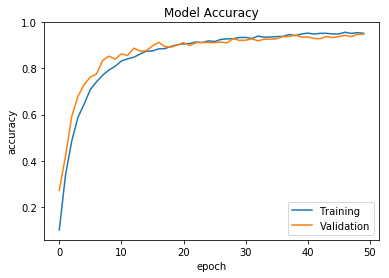

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'])


In [21]:
test_loss, test_accuracy = classifier.evaluate_generator(test_data, math.ceil(test_data.n / test_data.batch_size))
print("Accuracy on test set : {}".format(test_accuracy))

Accuracy on test set : 0.9344729344729344


In [22]:
validation_loss, validation_accuracy = classifier.evaluate_generator(validation_data, math.ceil(validation_data.n / validation_data.batch_size))
print("Accuracy on validation set: {}".format(validation_accuracy))

Accuracy on validation set: 0.9475783479179752


In [3]:
classifier_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(classifier_json)

classifier.save_weights("model.h5")
print("Model saved to disk")

NameError: name 'classifier' is not defined

In [45]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")
print('Loaded model from disk')

Loaded model from disk


In [46]:
loaded_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

HI I AM ANUSHA


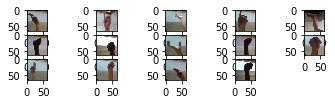

In [53]:
cat_dir = "Test"
cat_files = os.listdir(cat_dir)
sentence = ''
cpt = 0
for i in cat_files:
    cpt = cpt +1
    plt.subplot(9,5,cpt)
    img = load_img(os.path.join(cat_dir, i), target_size=(64,64))
    plt.imshow(img, cmap='gray')
    test_image = image.img_to_array(img)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    result = loaded_model.predict(test_image)
#   print(result)
    labels = np.argmax(result, axis=-1)  
    if labels[0] == 0:
        sentence += '0'
    elif labels[0] == 1:
        sentence += '1'
    elif labels[0] == 2:
        sentence += '2'
    elif labels[0] == 3:
        sentence += '3'
    elif labels[0] == 4:
        sentence += '4'
    elif labels[0] == 5:
        sentence += '5'
    elif labels[0] == 6:
        sentence += '6'
    elif labels[0] == 7:
        sentence += '7'
    elif labels[0] == 8:
        sentence += '8'
    elif labels[0] == 9:
        sentence += '9'
    elif labels[0] == 10:
        sentence += 'A'
    elif labels[0] == 11:
        sentence += 'B'
    elif labels[0] == 12:
        sentence += 'C'
    elif labels[0] == 13:
        sentence += 'D'
    elif labels[0] == 36:
        sentence = sentence[:-1]
    elif labels[0] == 14:
        sentence += 'E'
    elif labels[0] == 15:
        sentence += 'F'
    elif labels[0] == 16:
        sentence += 'G'
    elif labels[0] == 17:
        sentence += 'H'
    elif labels[0] == 18:
        sentence += 'I'
    elif labels[0] == 19:
        sentence += 'J'
    elif labels[0] == 20:
        sentence += 'K'
    elif labels[0] == 21:
        sentence += 'L'
    elif labels[0] == 22:
        sentence += 'M'
    elif labels[0] == 23:
        sentence += 'N'
    elif labels[0] == 37:
        sentence += ''
    elif labels[0] == 24:
        sentence += 'O'
    elif labels[0] == 25:
        sentence += 'P'
    elif labels[0] == 26:
        sentence += 'Q'
    elif labels[0] == 27:
        sentence += 'R'
    elif labels[0] == 28:
        sentence += 'S'
    elif labels[0] == 38:
        sentence += ' '
    elif labels[0] == 29:
        sentence += 'T'
    elif labels[0] == 30:
        sentence += 'U'
    elif labels[0] == 31:
        sentence += 'V'
    elif labels[0] == 32:
        sentence += 'W'
    elif labels[0] == 33:
        sentence += 'X'
    elif labels[0] == 34:
        sentence += 'Y'
    elif labels[0] == 35:
        sentence += 'Z'

print(sentence)

In [40]:
print("Enter:")
print("1 for English")
print("2 for Kannada")
print("3 for Hindi")
print("4 for Telugu")
lang = input()

Enter:
1 for English
2 for Kannada
3 for Hindi
4 for Telugu
2


In [41]:
if lang == '1':
    language = 'en'
elif lang == '2':
    language = 'kn'
elif lang == '3':
    language = 'hi'
elif lang == '4':
    language = 'te'
else:
    print('Please enter a proper value')

In [31]:
import googletrans

In [49]:
from googletrans import Translator
translator = Translator(service_urls=['translate.googleapis.com'])
result = translator.translate(sentence.lower(), dest=language)

In [50]:
print(result.text)

ಹಾಯ್ ನಾನು ಅನುಷಾ


In [51]:
from gtts import gTTS

In [52]:
output = gTTS(text=result.text, lang=language, slow=False, tld='com')
output.save('speech.mp3')

os.system("start speech.mp3")

0